## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
feature, target = datasets.load_wine(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.1, random_state=42)

def regression(regression_method = 'Lasso', alpha_scale = 0.01):
    coef_dict={}
    alpha_list=[]
    for i in range(1,30):
        
        if regression_method == 'Lasso':
            reg = Lasso(alpha=i*alpha_scale)
        elif regression_method == 'Ridge':
            reg = Ridge(alpha=i*alpha_scale)
        elif regression_method == 'PureLinear':
            reg =LinearRegression()
            reg.fit(x_train, y_train)
            coef = reg.coef_
            weight_number = [i for i in range(coef.shape[0])]
            plt.scatter(weight_number, coef, c=[i for i in range(len(weight_number))])
            plt.xlabel("weight number")
            plt.ylabel("weights")
            plt.show()
            return
            
        
        reg.fit(x_train, y_train)
        coef = reg.coef_
        if i == 1:
            for n, element in enumerate(coef):
                coef_dict['coef' + str(n)] = []

        for n, element in enumerate(coef):
            coef_dict['coef' + str(n)].append(element)

        alpha=i*alpha_scale
        alpha_list.append(alpha)


    for element in coef_dict:
        plt.plot(alpha_list,coef_dict[element], marker = "o")

        if regression_method == 'Lasso':
            plt.title("Lasso: weights versus alpha")
        elif regression_method == 'Ridge':
            plt.title("Ridge: weights versus alpha")

        plt.xlabel("alpha")
        plt.ylabel("weights")
    plt.show()
    return

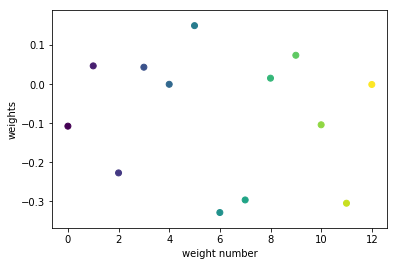

In [3]:
regression('PureLinear')

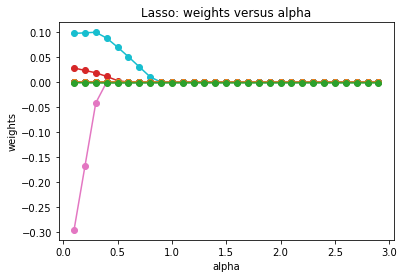

In [4]:
regression('Lasso', alpha_scale = 0.1)

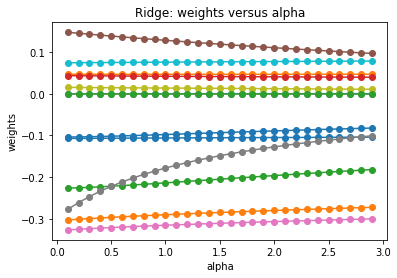

In [5]:
regression('Ridge', alpha_scale = 0.1)